<a href="https://colab.research.google.com/github/Niraj2003/Placement-Prediction/blob/master/Placement-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
placement = pd.read_csv("/content/drive/MyDrive/datasets/PlacementDataset.csv")

In [ ]:
placement.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [ ]:
placement_copy=placement.copy()

In [ ]:
placement_copy.shape

(215, 15)

In [ ]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

## NAN Handling

In [ ]:
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
placement_copy['salary'].fillna(value=0 , inplace = True )

In [ ]:
placement_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In [ ]:
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Outlier Handling

Text(0.5, 1.0, 'Employability Percentage')

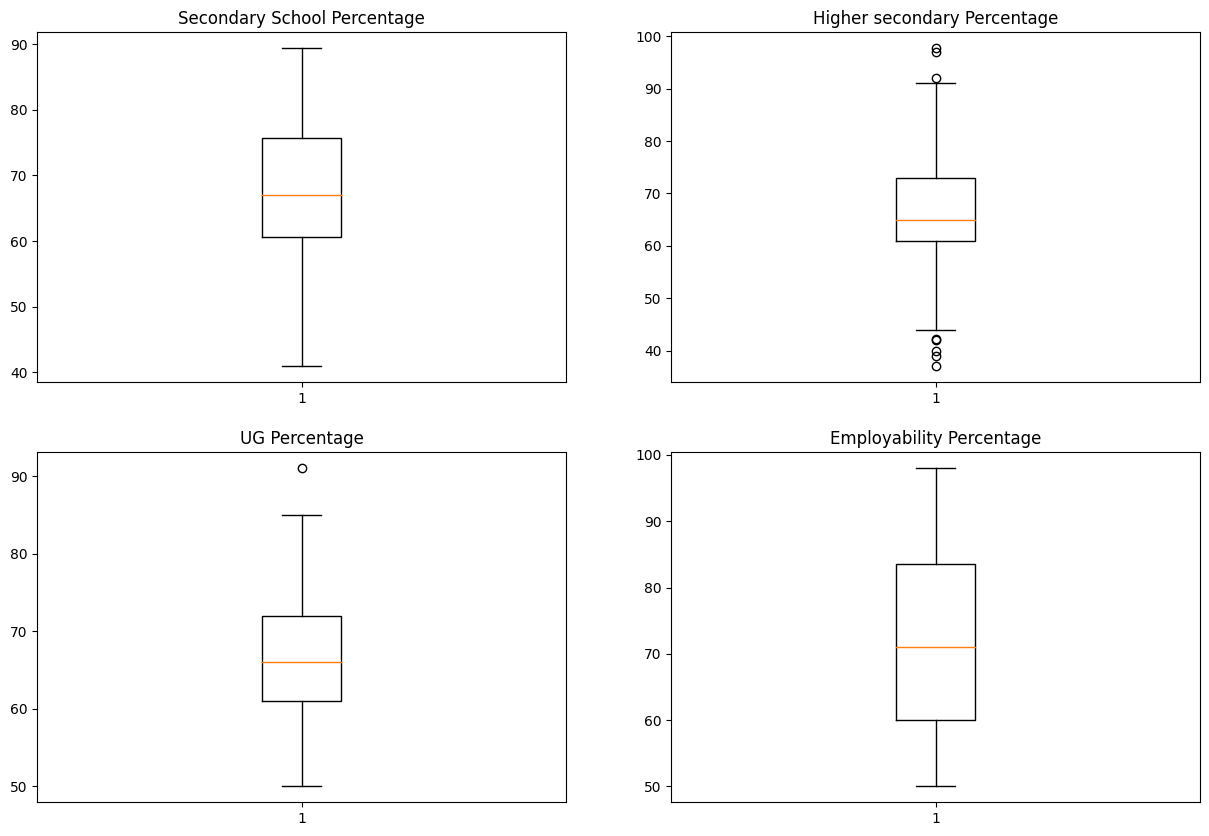

In [ ]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability Percentage')

In [ ]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f85e169fbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85e16d0160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85e169f940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85e16d0610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85e16d08b0>],
 'means': []}

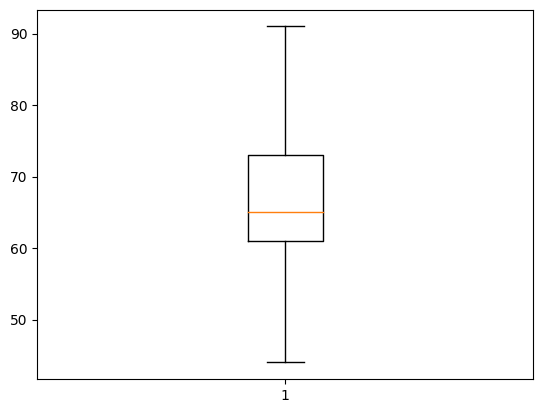

In [ ]:
plt.boxplot(placement_filtered['hsc_p'])

## Data Visualization

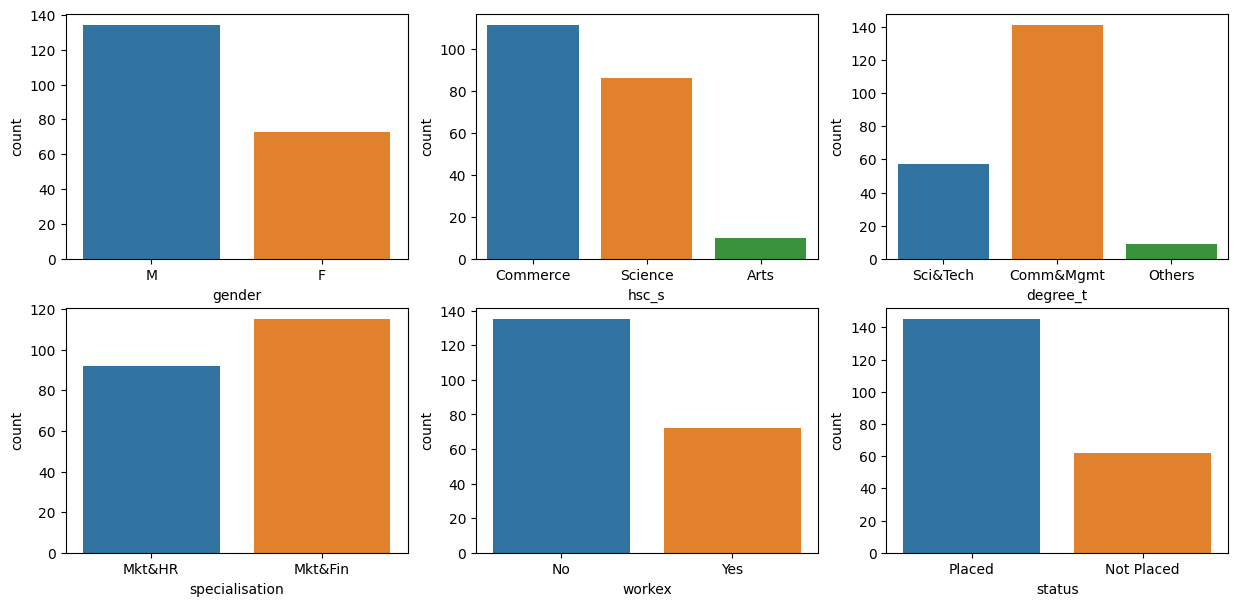

In [ ]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)


<Axes: xlabel='salary', ylabel='Density'>

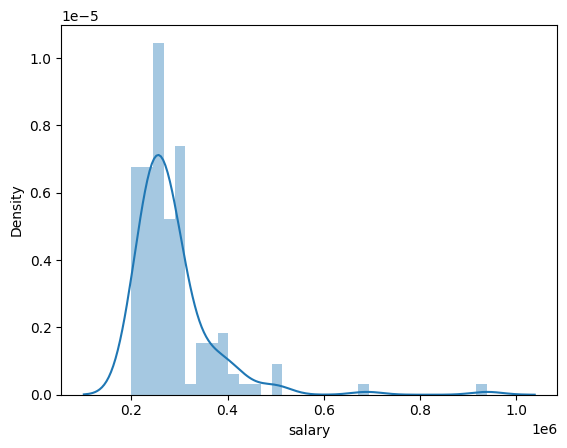

In [ ]:
placement_placed = placement_filtered[placement_filtered.salary!= 0]
sns.distplot(placement_placed['salary'])

In [ ]:
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

## Encoding

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])

placement_filtered.head(10)


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0,0.0


In [ ]:
# One Hot Encoding
dummy_hsc_s = pd.get_dummies(placement_filtered['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(placement_filtered['degree_t'], prefix = 'dummy')

placement_coded = pd.concat([placement_filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


## Splitting Data

In [ ]:
X = placement_coded.drop(['status'],axis=1)
y = placement_coded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

## Classification Models

#Logistic Regression Classifier

In [ ]:
#Logistic Regression -
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test , y_test))


0.8333333333333334


In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


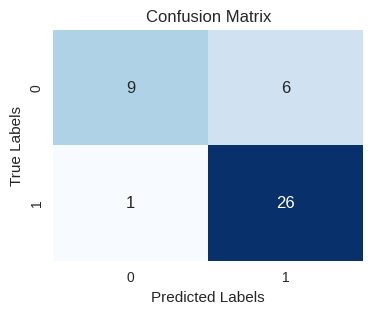

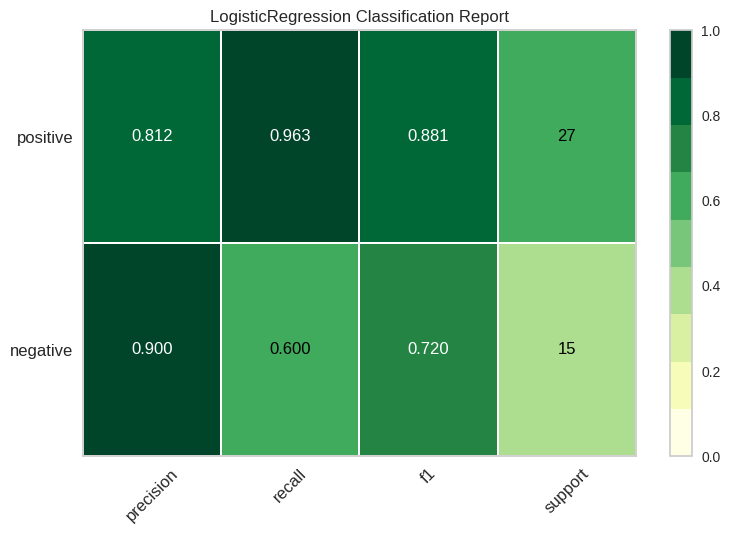

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the classification report, which includes precision, recall, and f1 score
report = classification_report(y_test, y_pred, output_dict=True)

# Plot the classification report
class_names = ['negative', 'positive']

visualizer = ClassificationReport(logreg, classes=class_names, support=True, cmap='YlGn',figsize=(4, 3), fig_scale=0.5)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#Logistic Regression Classifier with Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': loguniform(1e-4, 1e4),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}

logreg = LogisticRegression()

search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Best hyperparameters: {'C': 1.3827762586749435, 'l1_ratio': 0.75, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8787878787878789


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7380952380952381


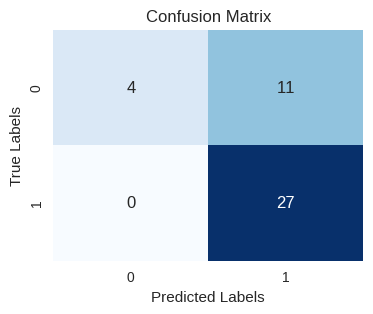

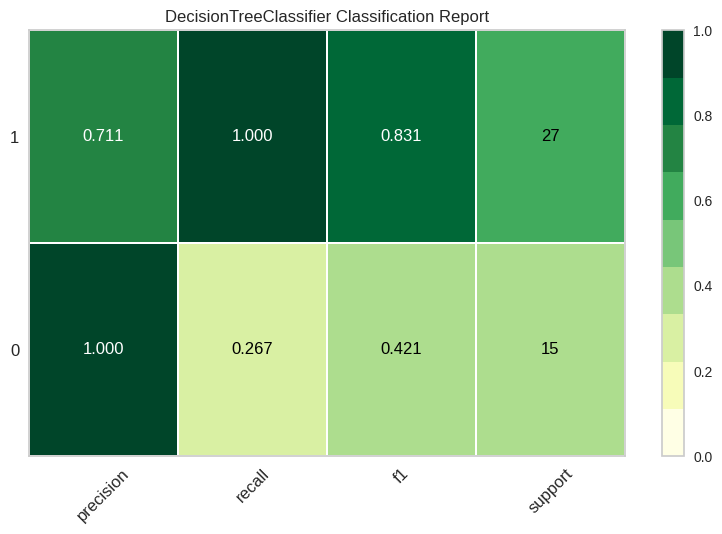

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the classification report, which includes precision, recall, and f1 score
report = classification_report(y_test, y_pred, output_dict=True)

# Plot the classification report
model = dt  # replace with your trained classifier
class_names = dt.classes_.tolist()  # replace with your list of class names
visualizer = ClassificationReport(model, classes=class_names, support=True, cmap='YlGn')
visualizer.score(X_test, y_test)
visualizer.show()


# Decision Tree Classifier with Hyperparameter

In [ ]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
}

dt = DecisionTreeClassifier()

search = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 9}
Best score: 0.8484848484848484


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



Accuracy 0.7619047619047619


Accuracy 0.7857142857142857


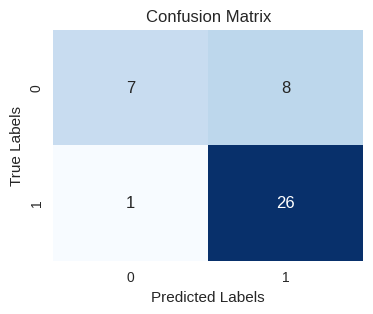

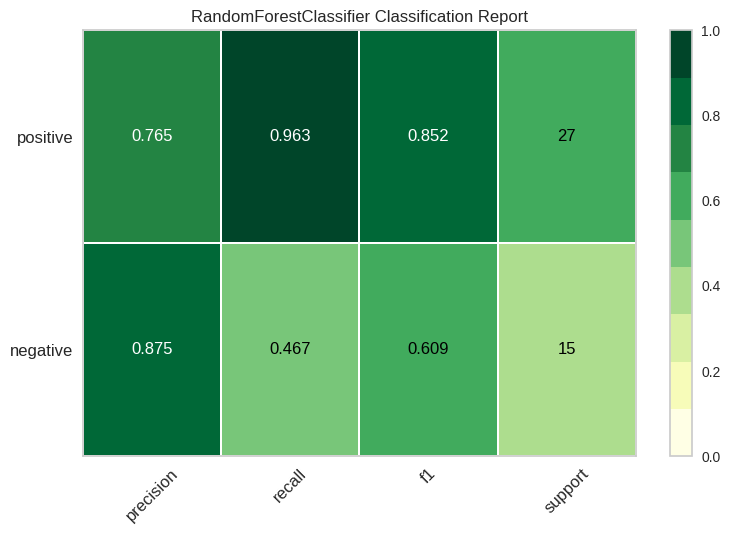

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt
import seaborn as sns

rt = RandomForestClassifier(n_estimators = 100)
rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

# Plot the confusion matrix as a heatmap
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the classification report, which includes precision, recall, and f1 score
report = classification_report(y_test, y_pred, output_dict=True)

# Plot the classification report
class_names = ['negative', 'positive']  # replace with your list of class names
visualizer = ClassificationReport(rt, classes=class_names, support=True, cmap='YlGn')
visualizer.score(X_test, y_test)
visualizer.show()


#Random Forest Classifier with Hyperparameter

In [ ]:
# Define the hyperparameters and their ranges
print("With Hyperparameter")
param_dist = {
    'n_estimators': randint(10, 500),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None] + list(range(1, 20)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100)

# Create an instance of RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_dist,
                               n_iter=100,
                               cv=5,
                               random_state=42,
                               n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
rf_random.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best parameters:", rf_random.best_params_)
print("Best score randomforest:", rf_random.best_score_)

# Use the best hyperparameters to build the final Random Forest Classifier model
rt = RandomForestClassifier(**rf_random.best_params_)
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test)

With Hyperparameter
Best parameters: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 14}
Best score randomforest: 0.8727272727272727
